<blockquote style='padding-top: 10px'><h2>Отчет для руководителя аналитического подразделения</h2><h3 style='padding-bottom: 20px'>Анализ проблемы оттока персонала</h3></blockquote>

In [41]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')

### Приводится толкование значений колонок в таблице

* <b>Age</b> - возраст сотрудника
* <b>Attrition</b> - уволился из компании или нет
* <b>BusinessTravel</b> - деловые поездки
    * Non-Travel
    * Travel_Frequently
    * Travel_Rarely
* <b>DailyRate</b> - дневная ставка
* <b>Department</b> - отдел, в котором работает сотрудник
* <b>DistanceFromHome</b> - показатель, влияющий на время пути от дома до работы
* <b>Education</b> - уровень образования сотрудника
    * 1  - 'Below College'
    * 2 -  'College'
    * 3  - 'Bachelor'
    * 4 - 'Master'
    * 5 - 'Doctor'
* <b>EducationField</b> - направление образования
* <b>EmployeeCount</b> - количество сотрудников
* <b>EmployeeNumber</b> - номер сотрудника
* <b> EnvironmentSatisfaction </b> - удовлетворенность окружающим
    * 1 - 'Low'
    * 2 - 'Medium'
    * 3 - 'High'
    * 4 - 'Very High'
* <b> Gender </b> - пол сотрудника
* <b> HourlyRate </b> - оклад в час
* <b> JobInvolvement </b> - вовлеченность в работу
    * 1 - 'Low'
    * 2 - 'Medium'
    * 3 - 'High'
    * 4 - 'Very High'
* <b> JobLevel </b> - грейды (1..5), где 1 - самый низкий грейд
* <b> JobRole </b> - наименование позиции
* <b> JobSatisfaction </b> - удовлетворенность работой
    * 1 - 'Low'
    * 2 - 'Medium'
    * 3 - 'High'
    * 4 - 'Very High'
* <b> MaritalStatus </b> - семейное положение
* <b> MonthlyIncome </b> - ежемесячный доход
* <b> MonthlyRate </b> - ежемесячная ставка
* <b> NumCompaniesWorked </b> - в скольких компаниях поработал
* <b> Over18 </b> - старше 18 лет или нет
* <b> OverTime </b> - были переработки или нет
* <b> PercentSalaryHike </b> - процентное повышение заработной платы
* <b> PerformanceRating </b> - оценка производительности
    * 1 - 'Low'
    * 2 - 'Good'
    * 3 - 'Excellent'
    * 4 - 'Outstanding'
* <b> RelationshipSatisfaction </b> - удовлетворенность взаимотношениями с коллегами
    * 1 - 'Low'
    * 2 - 'Medium'
    * 3 - 'High'
    * 4 - 'Very High'
* <b> StandardHours </b> - стандартные часы работы
* <b> StockOptionLevel </b> - уровень опциона на акции
* <b> TotalWorkingYears </b> - сколько всего лет работает сотрудник
* <b> TrainingTimesLastYear </b> - количество пройденных курсов в прошлом году
* <b> WorkLifeBalance </b> - баланс между работой и личной жизнью
    * 1 - 'Bad'
    * 2 - 'Good'
    * 3 - 'Better'
    * 4 - 'Best'
* <b> YearsAtCompany </b> - сколько лет работает в компании
* <b> YearsInCurrentRole </b> - сколько лет находится на данной позиции
* <b> YearsSinceLastPromotion </b> - количество лет с момента последнего повышения
* <b> YearsWithCurrManager </b> - количество лет работы с нынешним руководителем

<blockquote><h3>1. Базовая информация по данным в таблице</h3></blockquote>

In [42]:
df = pd.read_csv('Employee-Attrition.csv', sep=',')
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


#### Рассмотрим базовую информацию в таблице - типы данных столбцов, пропущенные значения и т.д.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Пропущенных значений нет, значения в таблице представлены <i><u>целочисленным</u></i> и <i><u>текстовым</u></i> типами данных.

#### Рассмотрим краткую сводку по таблице

In [44]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


* Всего 26 колонок, в которых данные - числа
* Средний возраст сотрдников - 37 лет. При этом самые молодые - 18 лет, самые взрослые - 60 лет
* В среднем удовлетворенность окружающим (EnvironmentSatisfaction) ближе к отметке 3 (High), но так же есть и сотрудники с отметкой 1
* В среднем удовлетворенность отношениями с коллегами (RelationshipSatisfaction) также ближе к отметке 3
* Баланс между работой и личной жизнью в среднем также около отметки 3
* В среднем стаж сотрудников - 11 лет, при этом непосредственно в компании в среднем отметка - 7 лет. (это значит, что видимой текучки кадров в компании не наблюдается)
* В среднем сотрудники работают на текущей позиции 4 года, количество лет с момента последнего повышения грейда - 2 года. Под управлением нынешнего руководителя - 4 года
* В среднем оценка работы сотрудника - 3, притом минимальная оценка тоже 3, максимальная - 4
* В среднем сотрудники имеют образование уровня 3 - бакалавр, так же в компании работают и магистры и даже доктора наук.

In [45]:
df.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


* Всего в данных 6 уникальных направлений образований
* Всего в данных 9 уникальных наименований позиций сотрудников (JobRole)
* В данных 3 уникальных наименований статуса семейного положения
* Мужчин в компании больше, чем женщин

In [46]:
df.Gender.groupby(df.Gender).count()

Gender
Female    588
Male      882
Name: Gender, dtype: int64

<blockquote><h3>2. Анализ проблемы оттока персонала</h3></blockquote>
<blockquote ><h3 style='margin-left: 2%;'>2.1 Удовлетворенность сотрудников работой в компании</h3></blockquote>

Рассмотрим, для начала, отдельно удовлетворенность сотрудников (EnvironmentSatisfaction) <br>
Как уже говорилось, в целом оценка удовлетворенности равна 3, что очень неплохо

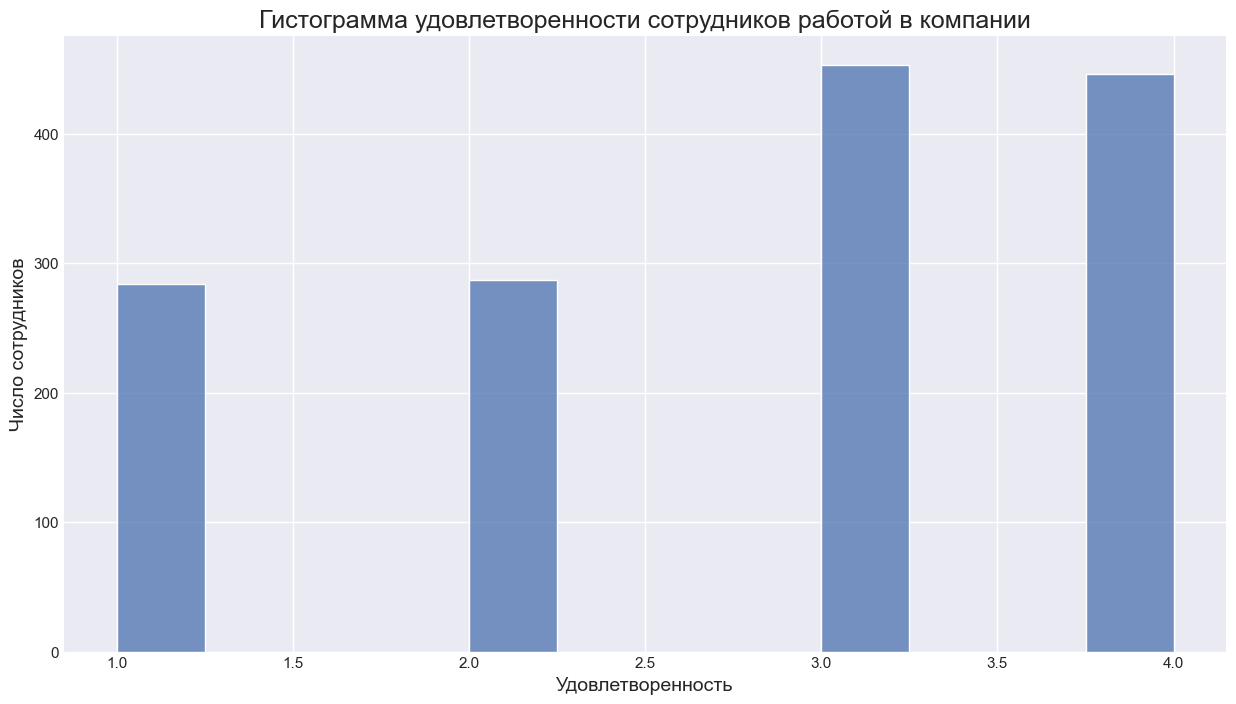

In [47]:
plt.figure(figsize=(15, 8))
sns.histplot(data=df.EnvironmentSatisfaction)
plt.title('Гистограмма удовлетворенности сотрудников работой в компании', fontsize=18)
plt.xlabel('Удовлетворенность', fontsize=14)
plt.ylabel('Число сотрудников', fontsize=14)
plt.show()

Как видно из гистограммы, довольно внушительное число сотрудников либо вовсе довольны окружающим, либо имеют относительно пессимистичную оценку - 2. <br>
Рассмотрим зависимость удовлетворенности от различных факторов:
* Заработная плата
* Образование 
* Удовлетворенность взаимотношениями с коллегами
* Баланс между работой и личной жизнью
* Количество лет с момента последнего повышения
* Переработки
* Вовлеченность в работу

Для этого создадим отдельный датафрейм с указанными выше факторами

In [48]:
# Создание вспомогательного столбца для отражения переработок в числовом вормате
df['overtimes'] = [1 if i == 'Yes' else 0 for i in df.OverTime]

In [49]:
df_EnvSatisfaction_check = df[['EnvironmentSatisfaction', 'MonthlyIncome', 'Education', 'RelationshipSatisfaction', 'WorkLifeBalance', 'YearsSinceLastPromotion', 'overtimes', 'JobInvolvement', 'JobLevel']]
df_EnvSatisfaction_check.head()

,EnvironmentSatisfaction,MonthlyIncome,Education,RelationshipSatisfaction,WorkLifeBalance,YearsSinceLastPromotion,overtimes,JobInvolvement,JobLevel
0,2,5993,2,1,1,0,1,3,2
1,3,5130,1,4,3,1,0,2,2
2,4,2090,2,2,3,0,1,2,1
3,4,2909,4,3,3,3,1,3,1
4,1,3468,1,4,3,2,0,3,1


Для анализа зависимостей построим матрицу парных корреляций

In [50]:
corr_EnvSatisfaction = df_EnvSatisfaction_check.corr()
corr_EnvSatisfaction

,EnvironmentSatisfaction,MonthlyIncome,Education,RelationshipSatisfaction,WorkLifeBalance,YearsSinceLastPromotion,overtimes,JobInvolvement,JobLevel
EnvironmentSatisfaction,1.000000,-0.006259,-0.027128,0.007665,0.027627,0.016194,0.070132,-0.008278,0.001212
MonthlyIncome,-0.006259,1.000000,0.094961,0.025873,0.030683,0.344978,0.006089,-0.015271,0.950300
Education,-0.027128,0.094961,1.000000,-0.009118,0.009819,0.054254,-0.020322,0.042438,0.101589
RelationshipSatisfaction,0.007665,0.025873,-0.009118,1.000000,0.019604,0.033493,0.048493,0.034297,0.021642
WorkLifeBalance,0.027627,0.030683,0.009819,0.019604,1.000000,0.008941,-0.027092,-0.014617,0.037818
YearsSinceLastPromotion,0.016194,0.344978,0.054254,0.033493,0.008941,1.000000,-0.012239,-0.024184,0.353885
overtimes,0.070132,0.006089,-0.020322,0.048493,-0.027092,-0.012239,1.000000,-0.003507,0.000544
JobInvolvement,-0.008278,-0.015271,0.042438,0.034297,-0.014617,-0.024184,-0.003507,1.000000,-0.012630
JobLevel,0.001212,0.950300,0.101589,0.021642,0.037818,0.353885,0.000544,-0.012630,1.000000


Отобразим ее графически

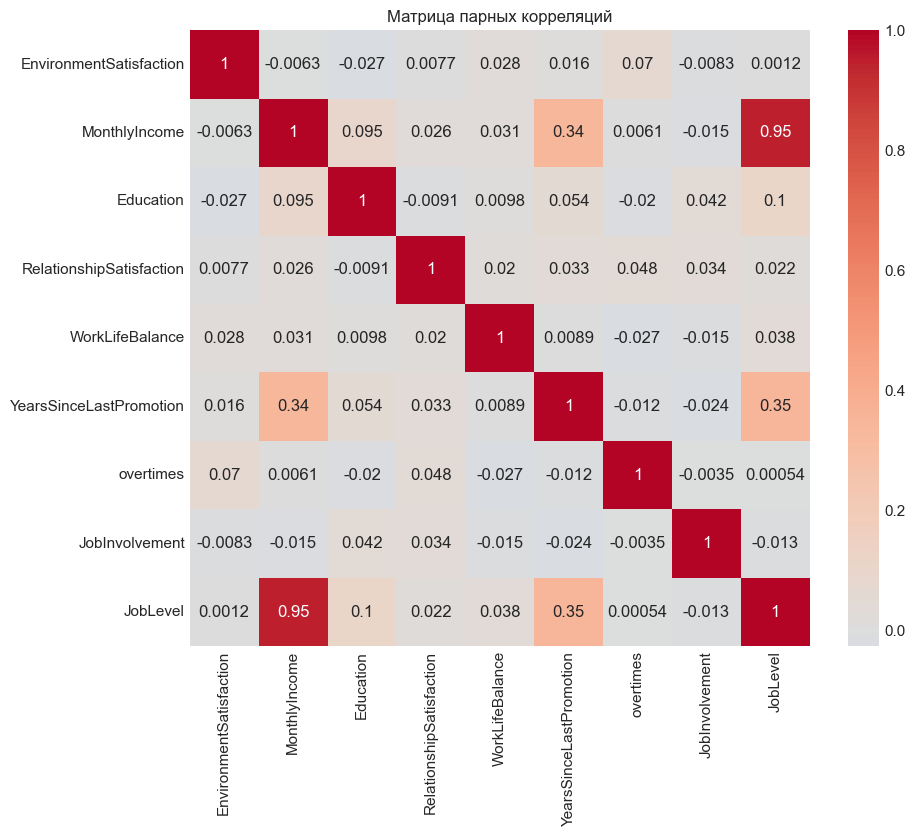

In [51]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_EnvSatisfaction, center=0, annot=True, cmap='coolwarm')
plt.title('Матрица парных корреляций')
plt.show()

По шкале Чеддока нигде нет выраженной статистической взаимосвязи между удовлетворенностью и выбранными факторами (т.е. коэффициент корреляции не очень большой), поэтому нет смысла строить диаграмму рассеяния для каждой пары <br>
Тем не менее, расположим в порядке убывания силы взаимосвязи эти данные. 

In [52]:
abs(corr_EnvSatisfaction.EnvironmentSatisfaction[1:]).sort_values(ascending=False).index.to_list()

['overtimes',
 'WorkLifeBalance',
 'Education',
 'YearsSinceLastPromotion',
 'JobInvolvement',
 'RelationshipSatisfaction',
 'MonthlyIncome',
 'JobLevel']

In [53]:
corr_EnvSatisfaction.EnvironmentSatisfaction[1:]

MonthlyIncome              -0.006259
Education                  -0.027128
RelationshipSatisfaction    0.007665
WorkLifeBalance             0.027627
YearsSinceLastPromotion     0.016194
overtimes                   0.070132
JobInvolvement             -0.008278
JobLevel                    0.001212
Name: EnvironmentSatisfaction, dtype: float64

Странно то, что чем больше прошло лет с момента последнего повышения, тем выше удовлетворенность сотрудника в компании. Вероятно, это связано с тем, что в опросе участвовали так же сотрудники, у которых в принципе не было повышения (т.е. сотрудники с грейдом = 1). Исключим их из рассмотрения и посмотрим на результат.

In [54]:
corr_EnvSatisfaction_gradesMore1 = df_EnvSatisfaction_check[df_EnvSatisfaction_check.JobLevel > 1].corr()

In [55]:
corr_EnvSatisfaction_gradesMore1.EnvironmentSatisfaction['YearsSinceLastPromotion']

-0.002920823225595639

Коэффициент стал отрицательным, т.е. чем больше прошло лет с последнего повышения, тем меньше доволен сотрудник. Однако величина этого коэффициента очень мала.

### Вывод
Больше всего на удовлетворенность сотрудника работой в компании влияют переработки. Вот топ факторов по убыванию силы влияния на удовлетворенность сотрудника работой в компании:
* Переработки (если они есть, то удовлетворенность меньше)
* Баланс между работой и личной жизнью (чем он больше, тем выше удовлетворенность)
* Образование (чем выше образование, тем ниже удовлетворенность)
* Вовлеченность в работу (чем она больше, тем меньше удовлетворенность)

<blockquote ><h3 style='margin-left: 2%;'>2.2 Влияние некоторых факторов на баланс между работой и личной жизнью</h3></blockquote>

В качестве этих факторов рассмотрим позицию (JobLevel), доход (MonthlyIncome), подразделение (Department)

Здесь также можно построить матрицу парных корреляций для всех факторов, за исключением подразделений. Исследовать влияние подрезделения на баланс между работой и личной жизнью будем иначе.

In [56]:
df_WorkLife_check = df[['WorkLifeBalance', 'JobLevel', 'MonthlyIncome']]
df_WorkLife_check.head()

,WorkLifeBalance,JobLevel,MonthlyIncome
0,1,2,5993
1,3,2,5130
2,3,1,2090
3,3,1,2909
4,3,1,3468


In [57]:
corr_WorkLife = df_WorkLife_check.corr()
corr_WorkLife

,WorkLifeBalance,JobLevel,MonthlyIncome
WorkLifeBalance,1.000000,0.037818,0.030683
JobLevel,0.037818,1.000000,0.950300
MonthlyIncome,0.030683,0.950300,1.000000


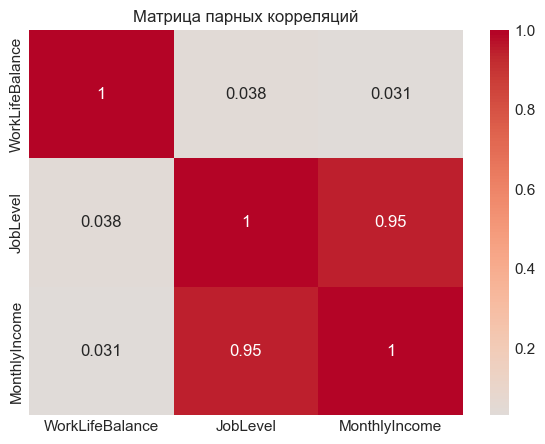

In [58]:
plt.figure(figsize=(7, 5))
sns.heatmap(corr_WorkLife, center=0, annot=True, cmap='coolwarm')
plt.title('Матрица парных корреляций')
plt.show()

Уровень грейда и доход, судя по опросу сотрудников, влияют на личную жизнь негативно. Т.е. чем выше грейд и доход, тем меньше времени на личную жизнь. Однако стоит учитывать, что и тут статистическая взаимосвязь по шкале Чеддока слабая.

Проанализируем влияние подразделеня на баланс между личной жизнью и работой

In [59]:
df_wl_check = df[['WorkLifeBalance', 'Department']]
df_wl_check.head()

,WorkLifeBalance,Department
0,1,Sales
1,3,Research & Development
2,3,Research & Development
3,3,Research & Development
4,3,Research & Development


In [60]:
df_wl_check.groupby(df_wl_check.Department, as_index=False).agg({'WorkLifeBalance':['median', 'mean', 'min', 'max']})

Department WorkLifeBalance                  
                                   median      mean min max
0         Human Resources             3.0  2.920635   1   4
1  Research & Development             3.0  2.725286   1   4
2                   Sales             3.0  2.816143   1   4

Из этой таблицы видно, что подразделение практически никак не влияет на баланс между личной жизнью и работой. Притом количество опрошенных в разрезе отделов можно посмотреть в таблице ниже:

In [61]:
df.Department.groupby(df.Department).count()

Department
Human Resources            63
Research & Development    961
Sales                     446
Name: Department, dtype: int64

### Вывод:
* Уровень грейда и доход влияют негативно на баланс между личной жизнью сотрудника и работой (чем они больше, тем меньше времени на личную жизнь)
    * Притом сам доход оказывает негативное влияние только потому, что связь между грейдом и доходом по шкале Чеддока "весьма высокая" - самая сильная из всех возможных
* Отдел, в котором работает сотрудник, никак не влияет на баланс между личной жизнью и работой

<blockquote ><h3 style='margin-left: 2%;'>2.3 Зависимость отношений на работе от подразделения и удовлетворенностью работой в компании</h3></blockquote>

Из таблицы парных корреляций (п. 2.1) видно, что, чем выше удовлетворенность работы в компании, тем  выше оценка сотрудника пункту "отношения с коллегами" (RelationshipSatisfaction)

Проанализируем взаимосвязь между оценкой отношений на работе и подразделениями

In [62]:
df_RelSat_check = df[['RelationshipSatisfaction', 'Department']]
df_RelSat_check.head()

,RelationshipSatisfaction,Department
0,1,Sales
1,4,Research & Development
2,2,Research & Development
3,3,Research & Development
4,4,Research & Development


In [63]:
df_RelSat_check.groupby(df_RelSat_check.Department, as_index=False).agg({'RelationshipSatisfaction':['median', 'mean', 'min', 'max']})

Department RelationshipSatisfaction                  
                                            median      mean min max
0         Human Resources                      3.0  2.888889   1   4
1  Research & Development                      3.0  2.708637   1   4
2                   Sales                      3.0  2.695067   1   4

Из таблицы выше видно, что, в среднем, сотрудники дали примерно одинаковые оценки взаимоотношениям с коллегами в разрезе отделов. Посмотрим в процентном соотношении.

In [64]:
df_RelSat_check.groupby(['RelationshipSatisfaction', 'Department'], as_index=False).count()


,RelationshipSatisfaction,Department
0,1,Human Resources
1,1,Research & Development
2,1,Sales
3,2,Human Resources
4,2,Research & Development
5,2,Sales
6,3,Human Resources
7,3,Research & Development
8,3,Sales
9,4,Human Resources


In [65]:
# Создаем df1 с количеством оценок 1 по отделам
df1 = df_RelSat_check[df_RelSat_check.RelationshipSatisfaction == 1]\
        .groupby(df_RelSat_check.Department).count()[['RelationshipSatisfaction']]

# Вычисляем процент оценок 1 по отделам
df1['RelationshipSatisfaction'] = round(df1['RelationshipSatisfaction']\
        / df.Department.groupby(df.Department).count() * 100, 1)

# Изменяем имя столбца для дальнейшего JOIN'а таблиц с разными оценками
df1.rename(columns = {'RelationshipSatisfaction':'1'}, inplace = True )

# Проделываем те же действия для таблиц с оценками 2, 3, 4

df2 = df_RelSat_check[df_RelSat_check.RelationshipSatisfaction == 2]\
        .groupby(df_RelSat_check.Department).count()[['RelationshipSatisfaction']]

df2['RelationshipSatisfaction'] = round(df2['RelationshipSatisfaction']\
         / df.Department.groupby(df.Department).count() * 100, 1)

df2.rename(columns = {'RelationshipSatisfaction':'2'}, inplace = True )

df3 = df_RelSat_check[df_RelSat_check.RelationshipSatisfaction == 3]\
        .groupby(df_RelSat_check.Department).count()[['RelationshipSatisfaction']]

df3['RelationshipSatisfaction'] = round(df3['RelationshipSatisfaction']\
         / df.Department.groupby(df.Department).count() * 100, 1)
df3.rename(columns = {'RelationshipSatisfaction':'3'}, inplace = True )

df4 = df_RelSat_check[df_RelSat_check.RelationshipSatisfaction == 4]\
        .groupby(df_RelSat_check.Department).count()[['RelationshipSatisfaction']]

df4['RelationshipSatisfaction'] = round(df4['RelationshipSatisfaction']\
         / df.Department.groupby(df.Department).count() * 100, 1)

df4.rename(columns = {'RelationshipSatisfaction':'4'}, inplace = True )

In [66]:
# формируем получившийся датасет с процентным количеством оценок по отделам
df_ratings_relationships = df1.merge(df2, on='Department').merge(df3, on='Department').merge(df4, on='Department')
df_ratings_relationships

,1,2,3,4
Department,,,,
Human Resources,12.7,17.5,38.1,31.7
Research & Development,18.0,22.1,31.0,28.9
Sales,21.3,17.9,30.7,30.0


Из таблицы выше видно, что в процентном соотношении  в отделе продаж (Sales) сотрудники в целом чаще давали оценку 1, чем в других отделах. <br>
Также в отделе HR (Human Resources) сотрудники в целом чаще давали оценку 3, чем в других отделах.
В остальном, сильной разницы нет.

Отобразим графически количество оценок людей в разных отделах

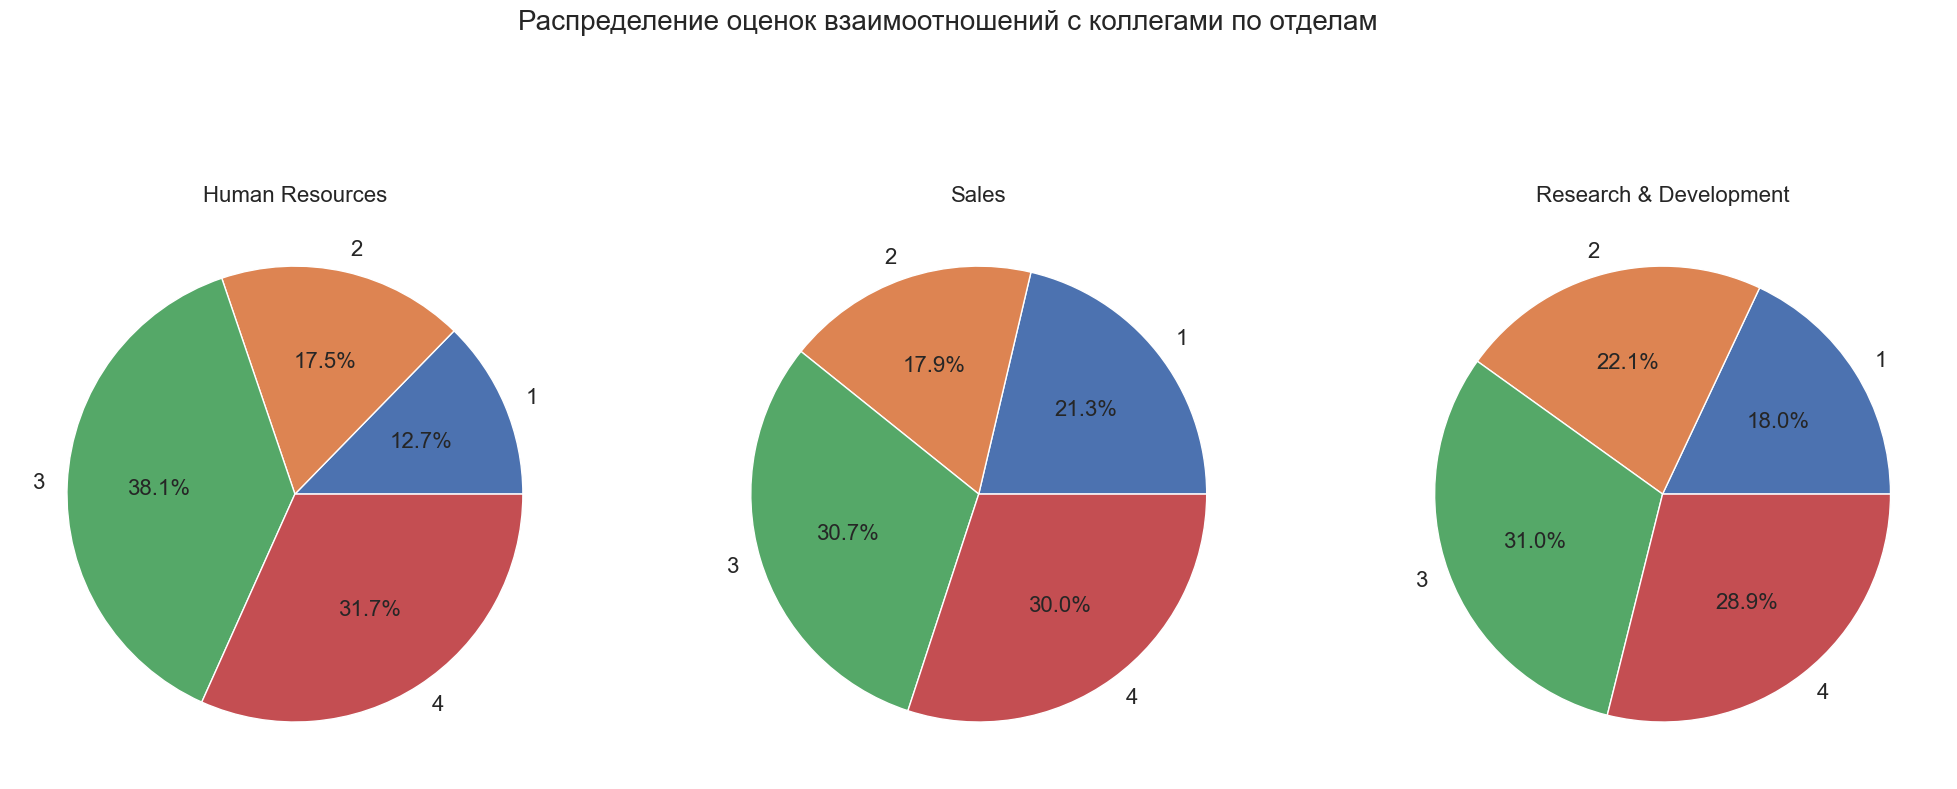

In [67]:
labels = [1, 2, 3, 4]
sns.set_theme()
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(25, 10))
plt.suptitle('Распределение оценок взаимоотношений с коллегами по отделам', fontsize = 20)
patches0, texts0, autotexts0 = ax[0].pie(df_ratings_relationships[df_ratings_relationships.index == 'Human Resources'].T['Human Resources'], labeldistance=1.1, autopct='%1.1f%%', labels=labels)
ax[0].set_title('Human Resources', fontsize=16)
[i.set_fontsize(16) for i in texts0]
[i.set_fontsize(16) for i in autotexts0]

patches1, texts1, autotexts1 = ax[1].pie(df_ratings_relationships[df_ratings_relationships.index == 'Sales'].T['Sales'], labeldistance=1.1, autopct='%1.1f%%', labels=labels)
ax[1].set_title('Sales', fontsize=16)
[i.set_fontsize(16) for i in texts1]
[i.set_fontsize(16) for i in autotexts1]

patches2, texts2, autotexts2 = ax[2].pie(df_ratings_relationships[df_ratings_relationships.index == 'Research & Development'].T['Research & Development'], labeldistance=1.1, autopct='%1.1f%%', labels=labels)
ax[2].set_title('Research & Development', fontsize=16)
[i.set_fontsize(16) for i in texts2]
[i.set_fontsize(16) for i in autotexts2]

plt.show()

### Выводы
* Чем выше удовлетворенность работы в компании, тем  выше оценка сотрудника пункту "отношения с коллегами" (RelationshipSatisfaction)
* Отдел Sales "лидирует" по количеству оценок 1 в процентном соотношении 
* Отдел Human Resources лидирует по числу оценок 3 в процентном соотношении

<blockquote ><h3 style='margin-left: 2%;'>2.4 Анализ удовлетворенности сотрудников в разрезе подразделений и грейдов</h3></blockquote>

In [68]:
df_EnvSat_Dep = df[['EnvironmentSatisfaction', 'Department']]
df_EnvSat_Dep.head()

,EnvironmentSatisfaction,Department
0,2,Sales
1,3,Research & Development
2,4,Research & Development
3,4,Research & Development
4,1,Research & Development


In [69]:
df_EnvSat_Dep.groupby(df_EnvSat_Dep.Department, as_index=False).agg({'EnvironmentSatisfaction':['median', 'mean', 'min', 'max']})

Department EnvironmentSatisfaction                  
                                           median      mean min max
0         Human Resources                     3.0  2.682540   1   4
1  Research & Development                     3.0  2.744017   1   4
2                   Sales                     3.0  2.679372   1   4

На первый взгляд, разницы между отделами так же не наблюдается <br>
Построим гистограммы оцениваний по отделам <br>
Для начала сформируем соответствующие датафреймы

In [70]:
sales = df_EnvSat_Dep[df_EnvSat_Dep.Department == 'Sales'].groupby(df_EnvSat_Dep.EnvironmentSatisfaction).count()[['Department']]
hr = df_EnvSat_Dep[df_EnvSat_Dep.Department == 'Human Resources'].groupby(df_EnvSat_Dep.EnvironmentSatisfaction).count()[['Department']]
rd = df_EnvSat_Dep[df_EnvSat_Dep.Department == 'Research & Development'].groupby(df_EnvSat_Dep.EnvironmentSatisfaction).count()[['Department']]

Построим график

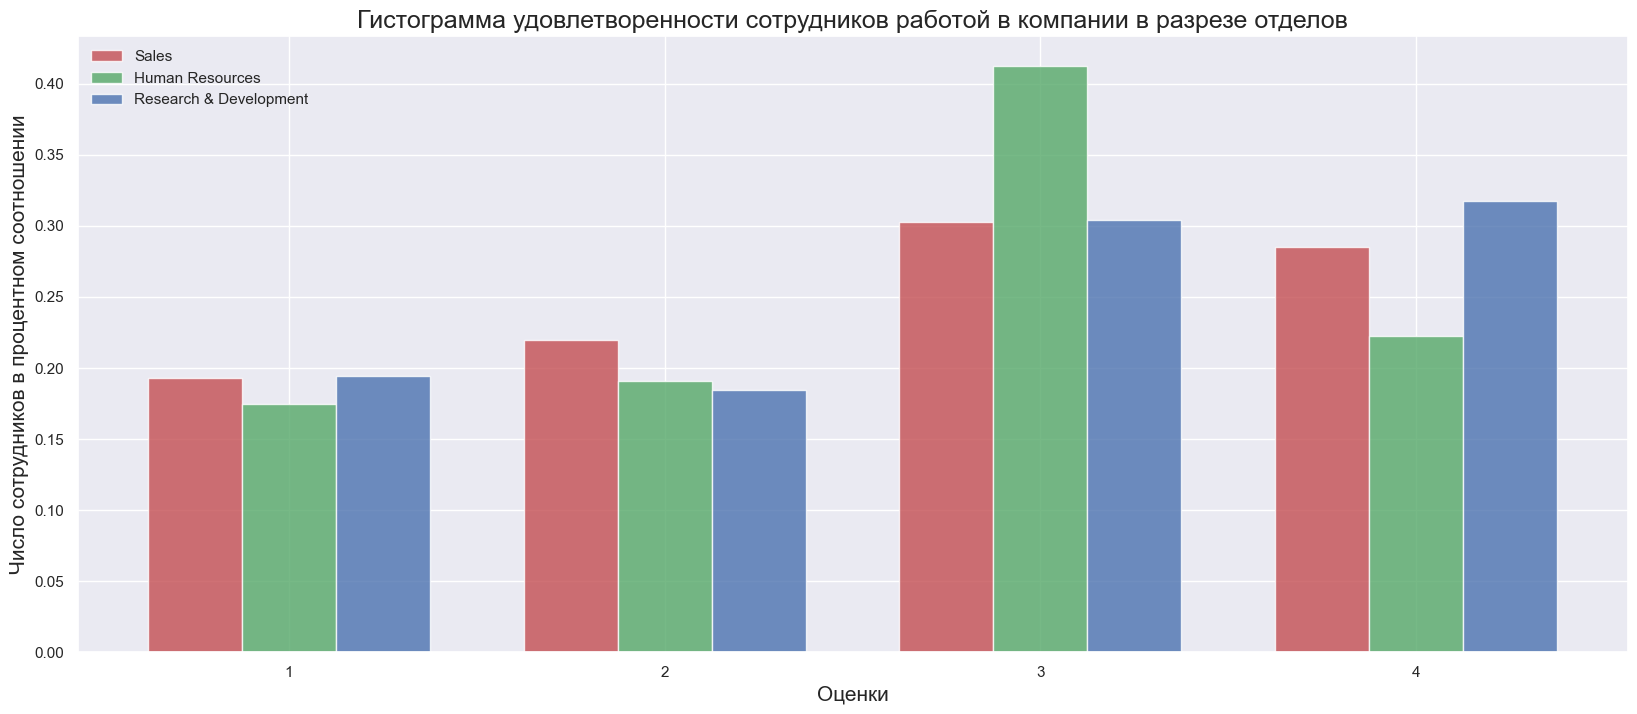

In [71]:
barWidth = 0.25
fig = plt.subplots(figsize =(20, 8))

br1 = sales.index - 1
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
 
sns.set_theme()
plt.bar(br1, sales.Department / df.Department.groupby(df.Department).count()[2], color ='r', width = barWidth,
        label ='Sales', alpha=0.8)
plt.bar(br2, hr.Department / df.Department.groupby(df.Department).count()[0], color ='g', width = barWidth,
        label ='Human Resources', alpha=0.8)
plt.bar(br3, rd.Department / df.Department.groupby(df.Department).count()[1], color ='b', width = barWidth,
        label ='Research & Development', alpha=0.8)
 
plt.title('Гистограмма удовлетворенности сотрудников работой в компании в разрезе отделов', fontsize=18)
plt.xlabel('Оценки', fontsize = 15)
plt.ylabel('Число сотрудников в процентном соотношении', fontsize = 15)
plt.xticks([r + barWidth for r in range(4)], [1, 2, 3, 4])
 
plt.legend(loc='upper left')
plt.show()


Из графика видно, что только оценки 3 в отделе HR значительно превышают оценки 3 в остальных отделах, и, соответственно, количество оценок 4 у них меньше.

Проведем теперь анализ в разрезе грейдов.

In [72]:
df_EnvSat_g = df[['EnvironmentSatisfaction', 'JobLevel']]
df_EnvSat_g.head()

,EnvironmentSatisfaction,JobLevel
0,2,2
1,3,2
2,4,1
3,4,1
4,1,1


In [73]:
df_EnvSat_g.groupby(df_EnvSat_g.JobLevel, as_index=False).agg({'EnvironmentSatisfaction':['median', 'mean', 'min', 'max']})

JobLevel EnvironmentSatisfaction                  
                            median      mean min max
0        1                     3.0  2.718232   1   4
1        2                     3.0  2.739700   1   4
2        3                     3.0  2.660550   1   4
3        4                     3.0  2.754717   1   4
4        5                     3.0  2.753623   1   4

На первый взгляд, разницы между отделами так же не наблюдается <br>
Построим гистограммы оцениваний по грейдам <br>
Для начала сформируем соответствующие датафреймы

In [74]:
grades = [df_EnvSat_g[df_EnvSat_g.JobLevel == i + 1 ].groupby(df_EnvSat_g.EnvironmentSatisfaction).count()[['JobLevel']] \
          for i in range(df.JobLevel.unique().size)]

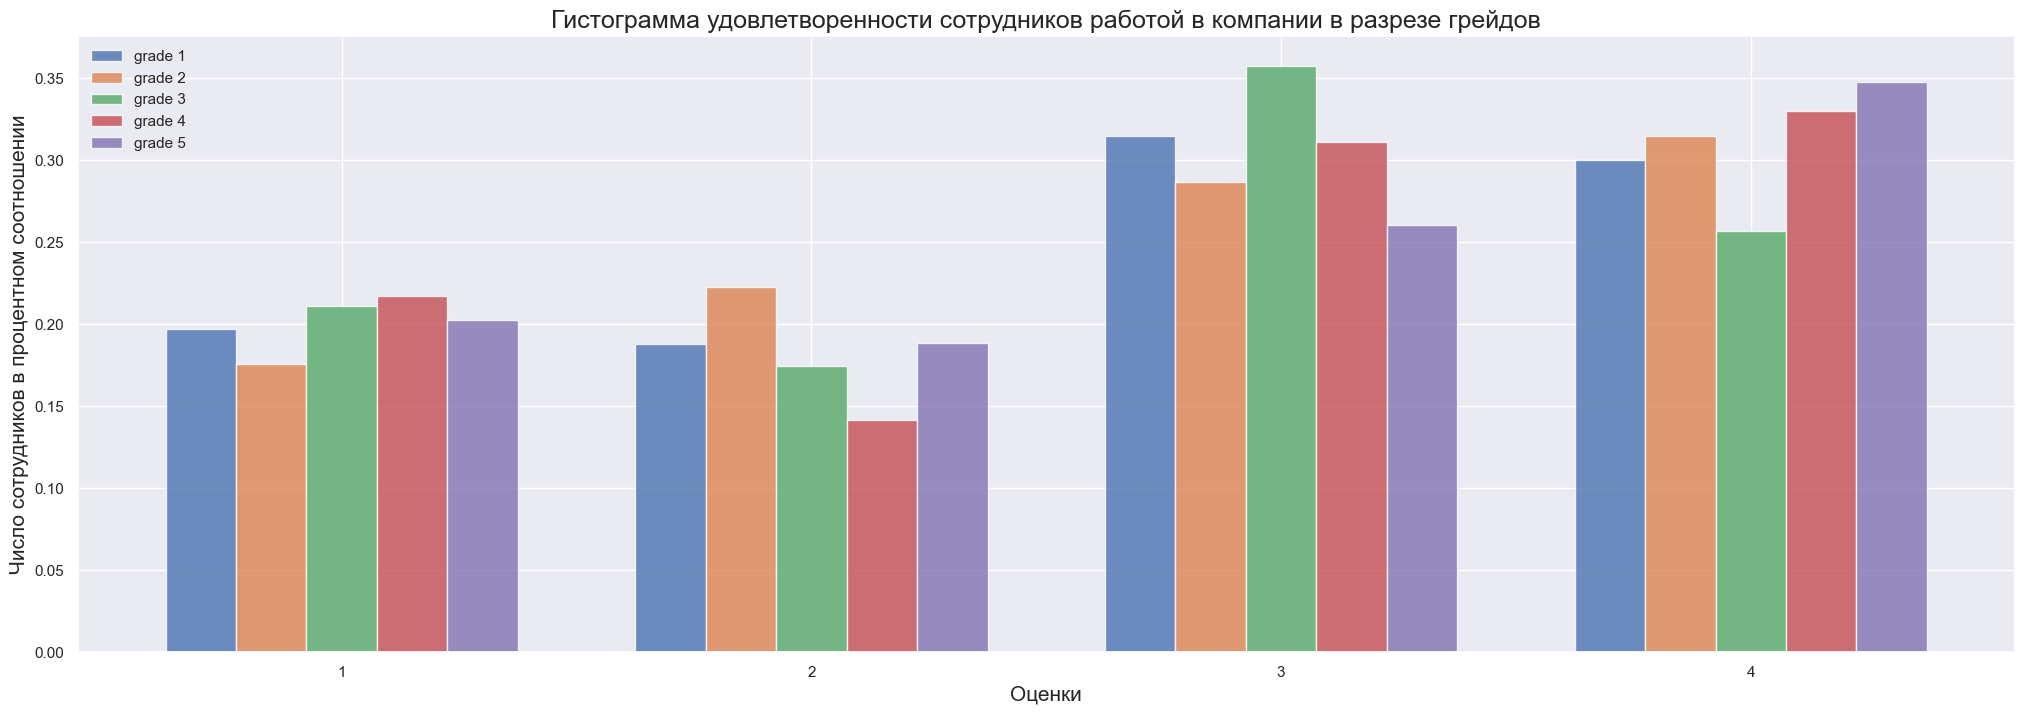

In [75]:
barWidth = 0.15
fig = plt.subplots(figsize =(25, 8))
num_graphs = df.JobLevel.unique().size

br = [[0, 1, 2, 3]]
for i in range(num_graphs - 1):
    br.append([x + barWidth for x in br[i]])

sns.set_theme()

for i in range(num_graphs):
        plt.bar(br[i], grades[i].JobLevel / int(grades[i].sum()), width = barWidth,
                label =f'grade {i+1}', alpha=0.8)

 
plt.title('Гистограмма удовлетворенности сотрудников работой в компании в разрезе грейдов', fontsize=18)
plt.xlabel('Оценки', fontsize = 15)
plt.ylabel('Число сотрудников в процентном соотношении', fontsize = 15)
plt.xticks([r + 2*barWidth for r in range(4)], [1, 2, 3, 4])
 
plt.legend(loc='upper left')
plt.show()

### Выводы:
1. Удовлетворенность компанией в разрезе грейдов:
    * Оценки 1:
        * У грейда 2 меньше, чем у всех остальных грейдов - 17%
        * У остальных грейдов примерно на одном уровне - 20%
    * Оценки 2:
        * У грейда 2 больше, чем у всех остальных грейдов - 22%
        * У грейда 4 меньше, чем у всех остальных - 14%
        * У остальных грейдов примерно на одном уровне - 18%
    * Оценки 3:
        * У грейда 4 выше, чем у остальных - 35%
        * У грейда 5 меньше всех - 26%
        * У остальных грейдов примерно на одном уровне - 30%
    * Оценки 4:
        * У грейда 5 больше всех - 35%
        * У грейдов 1, 2 и 3 - 30..33%
        * У грейда меньше всех - 26%
2. Удовлетворенность компанией в разрезе отделов:
    * Оценки 3 в отделе HR значительно превышают оценки 3 в остальных отделах, и, соответственно, количество оценок 4 у них меньше. В остальном, весомой разницы не наблюдается
